## Import Libraries

In [1]:
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
from scipy.signal import convolve2d as conv2d
import time

## Load and preprocess Image

img shape: (600, 540)


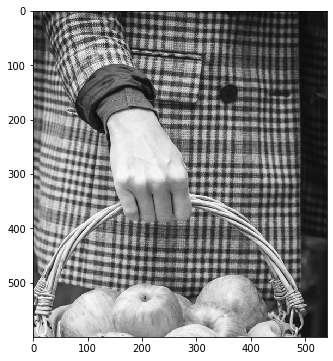

In [2]:
img_raw = np.array(imread('apples.jpg')).astype(np.float64) / 255.
img = np.mean(img_raw, axis=2)
img = img[0:600, 100:900]
print("img shape:", img.shape)
plt.figure(figsize=(12, 6))
plt.imshow(img, cmap='gray')
plt.show()

## Simple convolutions

In [3]:
blur_kernel = np.array([[1, 1, 1],
                        [1, 1, 1],
                        [1, 1, 1]]) / 9

img_blur = conv2d(img, blur_kernel, mode='same', boundary='symm')

img_blur_repeat = img_blur.copy()
for i in range(10):
    img_blur_repeat = conv2d(img_blur_repeat, blur_kernel, mode='same', boundary='symm')

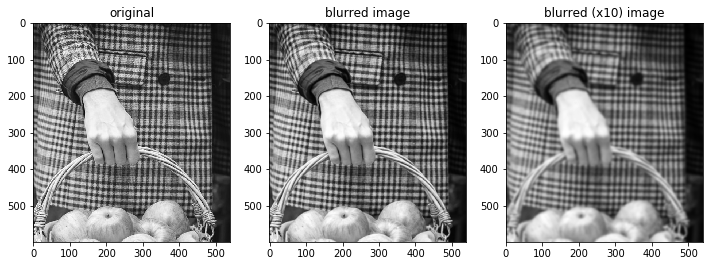

In [4]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('original')

plt.subplot(1, 3, 2)
plt.imshow(img_blur, cmap='gray')
plt.title('blurred image')

plt.subplot(1, 3, 3)
plt.imshow(img_blur_repeat, cmap='gray')
plt.title('blurred (x10) image')
plt.show()

## Different kinds of Padding
### Full
The output is the full discrete linear convolution
of the inputs. (Default)

### Valid
The output consists only of those elements that do not
rely on the zero-padding. In 'valid' mode, either `input image` or `kernel`
must be at least as large as the other in every dimension.

### Same
The output is the same size as `input image`, centered
with respect to the 'full' output.

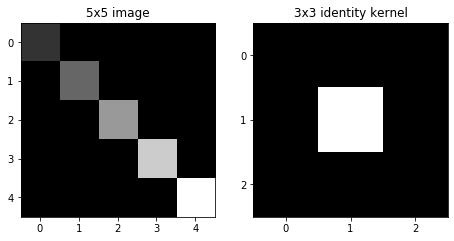

In [5]:
img_5x5 = np.eye(5)
for i in range(5):
    img_5x5[i, i] += i
k_3x3 = np.zeros((3, 3))
k_3x3[1, 1] = 1.

plt.figure(figsize=(16, 8))
plt.subplot(1, 4, 1)
plt.imshow(img_5x5, cmap='gray')
plt.title('5x5 image')

plt.subplot(1, 4, 2)
plt.imshow(k_3x3, cmap='gray')
plt.title('3x3 identity kernel')
plt.xticks([0, 1, 2])
plt.yticks([0, 1, 2])
plt.show()

In [6]:
img_conv_full = conv2d(img_5x5, k_3x3, mode='full')
img_conv_valid = conv2d(img_5x5, k_3x3, mode='valid')
img_conv_same = conv2d(img_5x5, k_3x3, mode='same')

print("img_5x5.shape:", img_5x5.shape)
print("img_conv_full.shape:", img_conv_full.shape)
print("img_conv_valid.shape:", img_conv_valid.shape)
print("img_conv_same.shape:", img_conv_same.shape)

img_5x5.shape: (5, 5)
img_conv_full.shape: (7, 7)
img_conv_valid.shape: (3, 3)
img_conv_same.shape: (5, 5)


Text(0.5, 1.0, 'same 5x5')

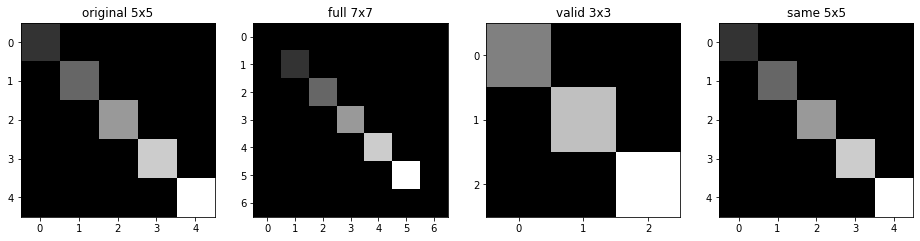

In [7]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 4, 1)
plt.imshow(img_5x5, cmap='gray')
plt.title('original 5x5')

plt.subplot(1, 4, 2)
plt.imshow(img_conv_full, cmap='gray')
plt.title('full 7x7')
plt.xticks(range(img_conv_full.shape[0]))

plt.subplot(1, 4, 3)
plt.imshow(img_conv_valid, cmap='gray')
plt.title('valid 3x3')
plt.xticks([0, 1, 2])
plt.yticks([0, 1, 2])

plt.subplot(1, 4, 4)
plt.imshow(img_conv_same, cmap='gray')
plt.title('same 5x5')

As an exercise, try using different kinds of kernels to see what happens in the different modes.

## Different kinds of Boundaries

### Fill
pad input arrays with fillvalue. (default)

### Wrap
circular boundary conditions.

### Symm
symmetrical boundary conditions.

img_5x5:
 [[0.2 0.  0.  0.  0. ]
 [0.  0.4 0.  0.  0. ]
 [0.  0.  0.6 0.  0. ]
 [0.  0.  0.  0.8 0. ]
 [0.  0.  0.  0.  1. ]]


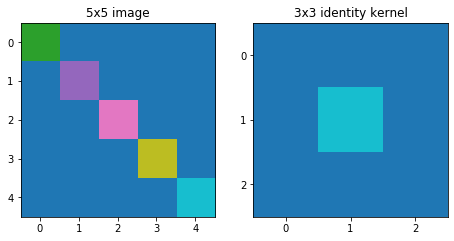

In [8]:
img_5x5 = np.eye(5)
for i in range(5):
    img_5x5[i, i] += i
img_5x5 /= 5.
print("img_5x5:\n", img_5x5)
k_3x3 = np.zeros((3, 3))
k_3x3[1, 1] = 1.

cmap='tab10'
plt.figure(figsize=(16, 8))
plt.subplot(1, 4, 1)
plt.imshow(img_5x5, cmap=cmap)
plt.title('5x5 image')

plt.subplot(1, 4, 2)
plt.imshow(k_3x3, cmap=cmap)
plt.title('3x3 identity kernel')
plt.xticks([0, 1, 2])
plt.yticks([0, 1, 2])
plt.show()

In [9]:
img_conv_fill = conv2d(img_5x5, k_3x3, boundary='fill')
img_conv_wrap = conv2d(img_5x5, k_3x3, boundary='wrap')
img_conv_symm = conv2d(img_5x5, k_3x3, boundary='symm')

print("img_5x5.shape:", img_5x5.shape)
print("img_conv_fill.shape:", img_conv_fill.shape)
print("img_conv_wrap.shape:", img_conv_wrap.shape)
print("img_conv_symm.shape:", img_conv_symm.shape)

img_5x5.shape: (5, 5)
img_conv_fill.shape: (7, 7)
img_conv_wrap.shape: (7, 7)
img_conv_symm.shape: (7, 7)


Why are the above shapes all 7x7? Because by default conv2d uses `full` padding.

Text(0.5, 1.0, 'symm 5x5')

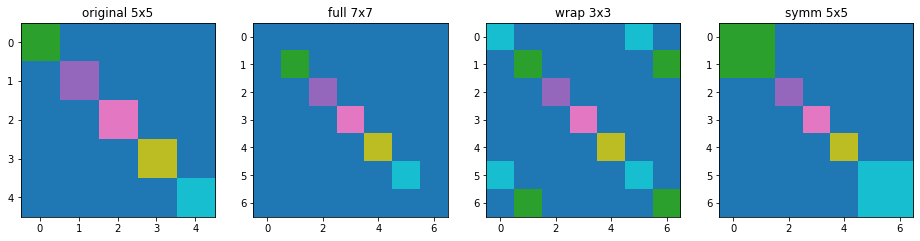

In [10]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 4, 1)
plt.imshow(img_5x5, cmap=cmap)
plt.title('original 5x5')

plt.subplot(1, 4, 2)
plt.imshow(img_conv_fill, cmap=cmap)
plt.title('full 7x7')

plt.subplot(1, 4, 3)
plt.imshow(img_conv_wrap, cmap=cmap)
plt.title('wrap 3x3')

plt.subplot(1, 4, 4)
plt.imshow(img_conv_symm, cmap=cmap)
plt.title('symm 5x5')

## Coding Convolutions

In [11]:
emboss_kernel = np.array([[-2, -1, 0],
                         [-1, 1, 1],
                         [0, 1, 2]])

In [12]:
def conv_naive(img, K):
    """
    key point: we move the kernel across the image
    """
    assert K.shape[0] % 2 == 1 # check if kernel is odd
    k = K.shape[0] # size of the kernel
    
    # set up an empty image to store convolved image
    # we assume 'valid' padding, hence it will be smaller than original
    img_conv = np.zeros((img.shape[0] - k + 1, img.shape[1] - k + 1))
    
    for i in range(img_conv.shape[0]):
        for j in range(img_conv.shape[1]):
            img_slice = img[i:i+k, j:j+k]
            img_conv[i, j] = np.sum(img_slice * K[::-1, ::-1])
    return img_conv

In [13]:
def conv_efficient(img, K):
    """
    key point: we move the image across the kernel
    """
    assert K.shape[0] % 2 == 1 # check if kernel is odd
    k = K.shape[0] # size of the kernel
    
    # set up an empty image to store convolved image
    # we assume 'valid' padding, hence it will be smaller than original
    img_conv = np.zeros((img.shape[0] - k + 1, img.shape[1] - k + 1))
    w, h = img_conv.shape
    
    for i in range(k):
        for j in range(k):
            img_conv = img_conv + img[i:i+w, j:j+h] * K[(k-1)-i, (k-1)-j]
    return img_conv

In [14]:
img_conv_naive = conv_naive(img, emboss_kernel)
img_conv_efficient = conv_efficient(img, emboss_kernel)
img_conv_scipy = conv2d(img, emboss_kernel, mode='valid')

print("img.shape:", img.shape)
print("img_conv_naive.shape:", img_conv_naive.shape)
print("img_conv_efficient.shape:", img_conv_efficient.shape)
print("img_conv_scipy.shape:", img_conv_scipy.shape)

img.shape: (600, 540)
img_conv_naive.shape: (598, 538)
img_conv_efficient.shape: (598, 538)
img_conv_scipy.shape: (598, 538)


Text(0.5, 1.0, 'scipy convolution')

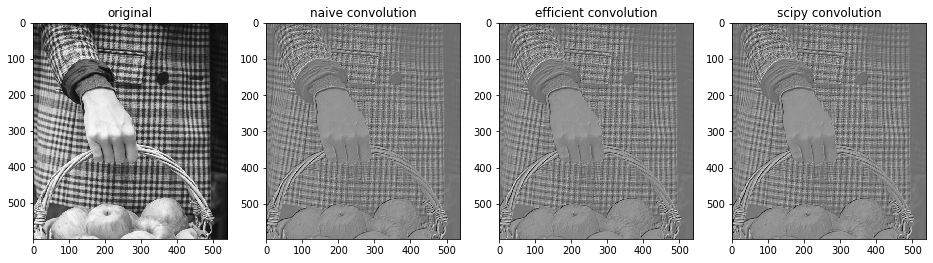

In [15]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.title('original')

plt.subplot(1, 4, 2)
plt.imshow(img_conv_naive, cmap='gray')
plt.title('naive convolution')

plt.subplot(1, 4, 3)
plt.imshow(img_conv_efficient, cmap='gray')
plt.title('efficient convolution')

plt.subplot(1, 4, 4)
plt.imshow(img_conv_scipy, cmap='gray')
plt.title('scipy convolution')

## Performance comparison

In [16]:
timeit conv_naive(img, emboss_kernel)

1.79 s ± 11.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [17]:
timeit conv_efficient(img, emboss_kernel)

3.61 ms ± 255 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [18]:
timeit conv2d(img, emboss_kernel, mode='valid')

9.16 ms ± 102 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
